In [1]:
#读取数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filtexrwarnings('ignore')
#读取数据
data=pd.read_excel('data_clean.xlsx')
#查看数据
data.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,3,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
1,5,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3
2,7,2022-12-25,554,extra,15554,1562,1,5,20,35,28,10,1
3,14,2022-12-18,547,taper,22166,2108,0,8,28,30,20,11,3
4,15,2022-12-17,546,chord,22336,2088,0,7,39,38,13,3,0


In [2]:
## Smoothing the data using a moving average to address discontinuities and outliers
# Using a simple moving average with a window size of 7 days

# Importing the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Forecasting with the ARIMA model
data=pd.read_excel('data_clean.xlsx')

data.iloc[:,1].size


175

In [3]:
#取出数据
data=data.iloc[:,[1,4]]
#查看数据
data.head()

,0,3
0,2022-12-29,20001
1,2022-12-27,20879
2,2022-12-25,15554
3,2022-12-18,22166
4,2022-12-17,22336


In [4]:
#数据平滑化
smoothed_data = data.rolling(window=7, min_periods=1).mean()
#查看数据
smoothed_data.head()

,3
0,20001.000000
1,20440.000000
2,18811.333333
3,19650.000000
4,20187.200000


In [5]:
#替换原来的数据
data.iloc[:,1]=smoothed_data.iloc[:,0]
#查看数据
data.head()

,0,3
0,2022-12-29,20001.000000
1,2022-12-27,20440.000000
2,2022-12-25,18811.333333
3,2022-12-18,19650.000000
4,2022-12-17,20187.200000


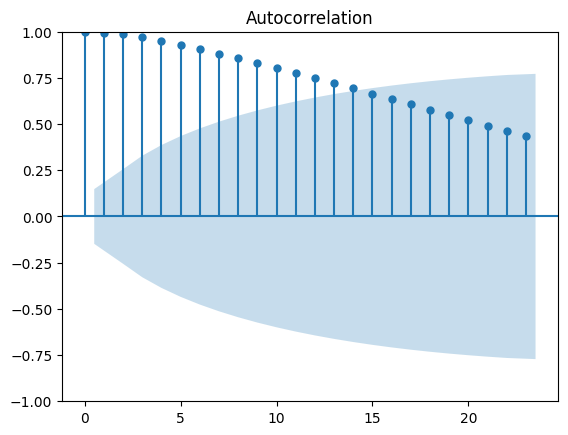

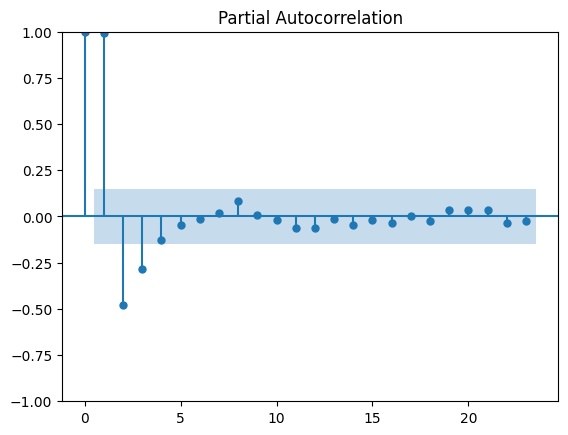

In [6]:
#查看acf和pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.iloc[:,1])
plot_pacf(data.iloc[:,1])
plt.show()


In [7]:
#拟合模型，查看模型的参数
from statsmodels.tsa.arima.model import ARIMA

# Fit the model自动选择最优的p,q,d
#使用 pmdarima 自动寻找最佳 ARIMA 模型参数
import pmdarima as pm

model = pm.auto_arima(data.iloc[:,1], seasonal=False)

# 打印模型摘要
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  175
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1623.046
Date:                Sun, 28 Jan 2024   AIC                           3250.093
Time:                        11:16:20   BIC                           3256.411
Sample:                             0   HQIC                          3252.656
                                - 175                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9079      0.016     55.176      0.000       0.876       0.940
sigma2      7.175e+06   2.99e+05     24.003      0.000    6.59e+06    7.76e+06
Ljung-Box (L1) (Q):                   1.32   Jarque-

In [11]:
import matplotlib.pyplot as plt

# Re-fitting the ARIMA model to the smoothed data
model_smoothed = ARIMA(smoothed_data, order=(1,1,0))
model_fit_smoothed = model_smoothed.fit()
#查看模型的参数
model_fit_smoothed.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      3   No. Observations:                  175
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1623.046
Date:                Sun, 28 Jan 2024   AIC                           3250.093
Time:                        11:16:40   BIC                           3256.411
Sample:                             0   HQIC                          3252.656
                                - 175                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9079      0.016     55.176      0.000       0.876       0.940
sigma2      7.175e+06   2.99e+05     24.003      0.000    6.59e+06    7.76e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):              1461.01
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

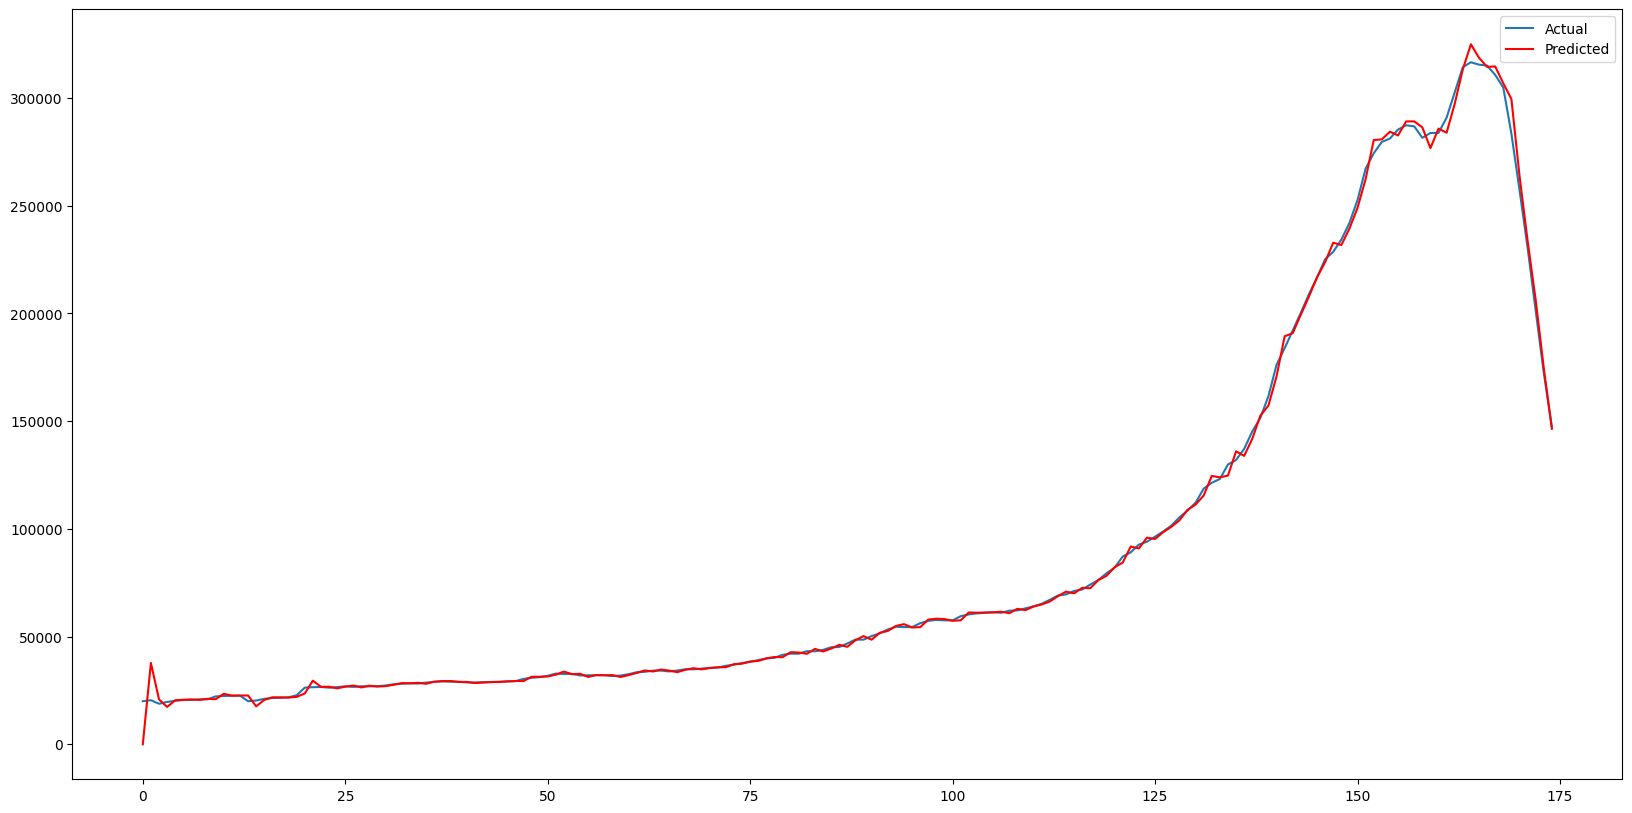

In [12]:
import matplotlib.pyplot as plt

# Plotting the forecasted values
plt.figure(figsize=(20,10))#设置画布大小，第一个参数是宽度，第二个参数是高度
plt.plot(data.iloc[:,1], label='Actual')
plt.plot(model_fit_smoothed.fittedvalues, color='red', label='Predicted')
plt.legend()
plt.show()

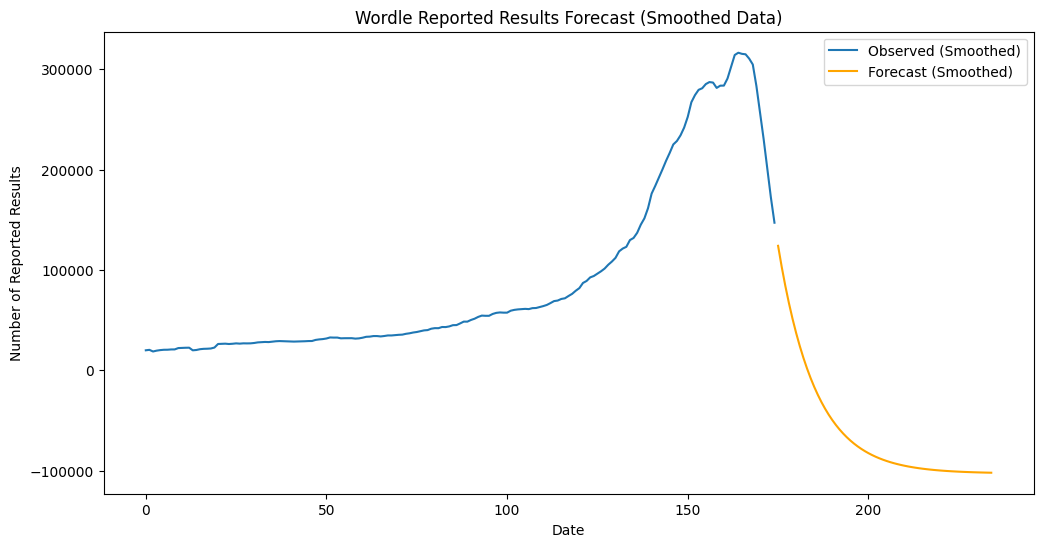

In [13]:
import matplotlib.pyplot as plt

# Forecasting with the smoothed data
forecast_smoothed = model_fit_smoothed.forecast(steps=60)

# Plotting the results with the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(smoothed_data, label='Observed (Smoothed)')
plt.plot(forecast_smoothed, label='Forecast (Smoothed)', color='orange')
plt.title('Wordle Reported Results Forecast (Smoothed Data)')
plt.xlabel('Date')
plt.ylabel('Number of Reported Results')
plt.legend()
plt.show()
